In [34]:
# Import core dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

# Import dependencies for API

import json
import requests 
import pprint

In [35]:
# Read and review stocks and sector infromation of the S&P500

sp500_info_df = pd.read_csv('Resources/S&P 500 Constituents/sp500-constituents.csv')
sp500_info_df

,Ticker,Name,Industry,Sub-Industry,Headquarters Location,Date added
0,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000
1,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",7/9/2015
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",11/30/1982
4,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",10/6/1997
499,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",8/7/2001
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",12/23/2019
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",6/22/2001


In [36]:
# Clean stocks and sectors dataframe, then create a new cleaned dataframe

renamed_sp500_info_df = sp500_info_df.rename(columns={"Ticker": "Symbol", "Name": "Description", 
                                                      "Industry": "Sector", "Sub-Industry": "Sub-sector"})
clean_sp500_info_df = pd.DataFrame(renamed_sp500_info_df[["Symbol", "Description", "Sector", "Sub-sector"]])
clean_sp500_info_df

,Symbol,Description,Sector,Sub-sector
0,A,Agilent Technologies,Health Care,Health Care Equipment
1,AAL,American Airlines Group,Industrials,Airlines
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
4,ABBV,AbbVie,Health Care,Pharmaceuticals
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [37]:
# Identify sectors and current number of their constituents/companies within the S&P500

clean_sp500_info_df["Sector"].value_counts()

Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: Sector, dtype: int64

In [38]:
# Read and review historical index price data for the S&P500

sp500_index_df = pd.read_csv('Resources/S&P 500 Historical Data Index/S&P 500 Historical Data.csv')

print(sp500_index_df.info())
sp500_index_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      241 non-null    object 
 1   Price     241 non-null    object 
 2   Open      241 non-null    object 
 3   High      241 non-null    object 
 4   Low       241 non-null    object 
 5   Vol.      0 non-null      float64
 6   Change %  241 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.3+ KB
None


,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2023,"4,070.56","3,858.38","4,094.32","3,793.67",NaN,6.02%
1,01/12/2022,"3,839.50","4,089.50","4,103.05","3,764.14",NaN,-5.90%
2,01/11/2022,"4,080.11","3,911.50","4,080.11","3,695.60",NaN,5.38%
3,01/10/2022,"3,871.98","3,624.07","3,906.05","3,490.00",NaN,7.99%
4,01/09/2022,"3,585.62","3,929.90","4,119.69","3,585.40",NaN,-9.34%
...,...,...,...,...,...,...,...
236,01/05/2003,963.59,916.92,965.38,902.83,NaN,5.09%
237,01/04/2003,916.92,848.18,924.24,847.85,NaN,8.10%
238,01/03/2003,848.18,841.15,895.90,788.90,NaN,0.84%
239,01/02/2003,841.15,855.70,864.64,806.29,NaN,-1.70%


In [39]:
# Adjust datatypes for all columns and delete unnecessary columns

sp500_index_df["Date"] = pd.to_datetime(sp500_index_df["Date"])

sp500_index_df["Price"] = sp500_index_df["Price"].replace({',': ''}, regex=True).astype(float)
sp500_index_df["Open"] = sp500_index_df["Open"].replace({',': ''}, regex=True).astype(float)
sp500_index_df["High"] = sp500_index_df["High"].replace({',': ''}, regex=True).astype(float)
sp500_index_df["Low"] = sp500_index_df["Low"].replace({',': ''}, regex=True).astype(float)

sp500_index_df["Change %"] = sp500_index_df["Change %"].str.rstrip('%').astype(float) / 100

del sp500_index_df["Vol."]

sp500_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      241 non-null    datetime64[ns]
 1   Price     241 non-null    float64       
 2   Open      241 non-null    float64       
 3   High      241 non-null    float64       
 4   Low       241 non-null    float64       
 5   Change %  241 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.4 KB


In [40]:
# Cleaned data of the S&P500 price index

clean_sp500_index_df = pd.DataFrame(sp500_index_df)
clean_sp500_index_df

,Date,Price,Open,High,Low,Change %
0,2023-01-01,4070.56,3858.38,4094.32,3793.67,0.0602
1,2022-01-12,3839.50,4089.50,4103.05,3764.14,-0.0590
2,2022-01-11,4080.11,3911.50,4080.11,3695.60,0.0538
3,2022-01-10,3871.98,3624.07,3906.05,3490.00,0.0799
4,2022-01-09,3585.62,3929.90,4119.69,3585.40,-0.0934
...,...,...,...,...,...,...
236,2003-01-05,963.59,916.92,965.38,902.83,0.0509
237,2003-01-04,916.92,848.18,924.24,847.85,0.0810
238,2003-01-03,848.18,841.15,895.90,788.90,0.0084
239,2003-01-02,841.15,855.70,864.64,806.29,-0.0170


In [41]:
# Read and review historical index price data per sector for the S&P500

sectors = ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 
           'Health Care', 'Industrials', 'Information Technology', 'Materials',
           'Real Estate', 'Communication Services', 'Utilities']

sectors_dic_df = {}

list_of_csv = ["S&P 500 Consumer Discretionary Historical Data",
               "S&P 500 Consumer Staples Historical Data",
               "S&P 500 Energy Historical Data",
               "S&P 500 Financials Historical Data",
               "S&P 500 Health Care Historical Data",
               "S&P 500 Industrials Historical Data",
               "S&P 500 Information Technology Historical Data",
               "S&P 500 Materials Historical Data",
               "S&P 500 Real Estate Historical Data",
               "S&P 500 Telecom Services Historical Data",
               "S&P 500 Utilities Historical Data"]

for file_name in list_of_csv:
    sectors_dic_df[file_name] = pd.read_csv(f'Resources/S&P 500 Historical Data Sectors/{file_name}.csv')
    sectors_dic_df[file_name]["Sector"] = sectors[list_of_csv.index(file_name)]  

sectors_merged_df = pd.concat(sectors_dic_df, ignore_index=True)

In [42]:
# Adjust datatypes for all columns and delete unnecessary columns

sectors_merged_df["Date"] = pd.to_datetime(sectors_merged_df["Date"])

sectors_merged_df["Price"] = sectors_merged_df["Price"].replace({',': ''}, regex=True).astype(float)
sectors_merged_df["Open"] = sectors_merged_df["Open"].replace({',': ''}, regex=True).astype(float)
sectors_merged_df["High"] = sectors_merged_df["High"].replace({',': ''}, regex=True).astype(float)
sectors_merged_df["Low"] = sectors_merged_df["Low"].replace({',': ''}, regex=True).astype(float)

sectors_merged_df["Change %"] = sectors_merged_df["Change %"].str.rstrip('%').astype(float) / 100

del sectors_merged_df["Vol."]

sectors_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2651 non-null   datetime64[ns]
 1   Price     2651 non-null   float64       
 2   Open      2651 non-null   float64       
 3   High      2651 non-null   float64       
 4   Low       2651 non-null   float64       
 5   Change %  2651 non-null   float64       
 6   Sector    2651 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 145.1+ KB


In [43]:
# Cleaned data of the S&P500 price index per sector

clean_sectors_index_df = pd.DataFrame(sectors_merged_df)
clean_sectors_index_df

,Date,Price,Open,High,Low,Change %,Sector
0,2023-01-01,1150.81,1010.71,1159.39,987.46,0.1445,Consumer Discretionary
1,2022-01-12,1005.48,1139.78,1140.89,981.17,-0.1131,Consumer Discretionary
2,2022-01-11,1133.65,1144.33,1146.40,1023.30,0.0081,Consumer Discretionary
3,2022-01-10,1124.52,1121.29,1176.83,1051.35,0.0020,Consumer Discretionary
4,2022-01-09,1122.31,1212.60,1311.72,1119.27,-0.0809,Consumer Discretionary
...,...,...,...,...,...,...,...
2646,2003-01-05,111.50,101.42,112.85,99.47,0.0984,Utilities
2647,2003-01-04,101.51,93.65,102.35,93.26,0.0845,Utilities
2648,2003-01-03,93.60,89.53,95.06,87.66,0.0460,Utilities
2649,2003-01-02,89.48,94.60,95.45,84.62,-0.0531,Utilities


In [44]:
# Import API Key and set all parameters for the URL


symbols_list = clean_sp500_info_df["Symbol"].unique()
join_symbols_list = ",".join(symbols_list)

url = f"https://financialmodelingprep.com/api/v3/quote/{join_symbols_list}?apikey=22dbcaceb6a52c7a3e45c0e18d57c333"
url

'https://financialmodelingprep.com/api/v3/quote/A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF.B,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BR,BRK.B,BRO,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDAY,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FIS,FISV,FITB,FLT,FMC,FOX,FOXA,FRC,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC

In [45]:
# Make calls/requests to Financial Modeling Prep API to get most updated data of each stock and store response

response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "avgVolume": 1303926,
        "change": 3.37,
        "changesPercentage": 2.2159,
        "dayHigh": 156.29,
        "dayLow": 151.72,
        "earningsAnnouncement": "2023-02-20T10:59:00.000+0000",
        "eps": 4.18,
        "exchange": "NYSE",
        "marketCap": 46024392400,
        "name": "Agilent Technologies, Inc.",
        "open": 153.31,
        "pe": 37.19,
        "previousClose": 152.08,
        "price": 155.45,
        "priceAvg200": 133.5171,
        "priceAvg50": 152.5366,
        "sharesOutstanding": 296072000,
        "symbol": "A",
        "timestamp": 1675285384,
        "volume": 1493619,
        "yearHigh": 160.26,
        "yearLow": 112.52
    },
    {
        "avgVolume": 28020360,
        "change": 0.55,
        "changesPercentage": 3.4077,
        "dayHigh": 16.715,
        "dayLow": 15.92,
        "earningsAnnouncement": "2023-01-26T13:30:00.000+0000",
        "eps": -3.671,
        "exchange": "NASDAQ",
        "marketCap": 10846847556,
  

In [46]:
# Dataframe created with the json response

sp500_index_today = pd.DataFrame.from_records(response)
sp500_index_today.head()

,symbol,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,...,exchange,volume,avgVolume,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp
0,A,"Agilent Technologies, Inc.",155.45,2.2159,3.37,151.7200,156.290,160.26,112.52,46024392400,...,NYSE,1493619,1303926,153.31,152.08,4.180,37.19,2023-02-20T10:59:00.000+0000,296072000,1675285384
1,AAL,American Airlines Group Inc.,16.69,3.4077,0.55,15.9200,16.715,21.42,11.65,10846847556,...,NASDAQ,26851055,28020360,16.04,16.14,-3.671,-4.55,2023-01-26T13:30:00.000+0000,649900992,1675285204
2,AAP,"Advance Auto Parts, Inc.",156.84,2.9945,4.56,150.1700,157.730,237.39,138.52,9293350308,...,NYSE,889499,1077205,151.94,152.28,7.800,20.11,2023-02-13T10:59:00.000+0000,59253700,1675285201
3,AAPL,Apple Inc.,145.43,0.7901,1.14,141.3200,146.610,179.61,124.17,2303058556692,...,NASDAQ,77013573,78291163,143.97,144.29,6.110,23.80,2023-02-02T21:00:00.000+0000,15836199936,1675285204
4,ABBV,AbbVie Inc.,146.60,-0.7783,-1.15,145.2652,147.440,175.91,133.05,259259168000,...,NYSE,5295645,5402345,146.63,147.75,7.500,19.55,2023-02-09T14:00:00.000+0000,1768480000,1675285388


In [47]:
# Clean today's data dataframe, then create a new cleaned dataframe

renamed_today_data = sp500_index_today.rename(columns={"symbol": "Symbol", "name": "Description", "price": "Price", 
                                                       "changesPercentage": "Change %", "marketCap": "Market Cap"})

clean_sp500_index_today = pd.DataFrame(renamed_today_data[["Symbol", "Description", "Price", "Change %", "Market Cap"]])
clean_sp500_index_today

,Symbol,Description,Price,Change %,Market Cap
0,A,"Agilent Technologies, Inc.",155.45,2.2159,46024392400
1,AAL,American Airlines Group Inc.,16.69,3.4077,10846847556
2,AAP,"Advance Auto Parts, Inc.",156.84,2.9945,9293350308
3,AAPL,Apple Inc.,145.43,0.7901,2303058556692
4,ABBV,AbbVie Inc.,146.60,-0.7783,259259168000
...,...,...,...,...,...
496,YUM,"Yum! Brands, Inc.",129.01,-1.1493,36340568880
497,ZBH,"Zimmer Biomet Holdings, Inc.",127.80,0.3612,26819085600
498,ZBRA,Zebra Technologies Corporation,328.63,3.9376,16967101174
499,ZION,"Zions Bancorporation, National Association",53.39,0.4327,7937170960


In [48]:
# Today's data including the sector of S&P500

sp500_index_sector_today = pd.merge(clean_sp500_index_today, clean_sp500_info_df[['Symbol', 'Sector', 'Sub-sector']], 
                                    on='Symbol', how='left')

print(sp500_index_sector_today.info())
sp500_index_sector_today

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       501 non-null    object 
 1   Description  501 non-null    object 
 2   Price        501 non-null    float64
 3   Change %     501 non-null    float64
 4   Market Cap   501 non-null    int64  
 5   Sector       501 non-null    object 
 6   Sub-sector   501 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 31.3+ KB
None


,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
0,A,"Agilent Technologies, Inc.",155.45,2.2159,46024392400,Health Care,Health Care Equipment
1,AAL,American Airlines Group Inc.,16.69,3.4077,10846847556,Industrials,Airlines
2,AAP,"Advance Auto Parts, Inc.",156.84,2.9945,9293350308,Consumer Discretionary,Automotive Retail
3,AAPL,Apple Inc.,145.43,0.7901,2303058556692,Information Technology,"Technology Hardware, Storage & Peripherals"
4,ABBV,AbbVie Inc.,146.60,-0.7783,259259168000,Health Care,Pharmaceuticals
...,...,...,...,...,...,...,...
496,YUM,"Yum! Brands, Inc.",129.01,-1.1493,36340568880,Consumer Discretionary,Restaurants
497,ZBH,"Zimmer Biomet Holdings, Inc.",127.80,0.3612,26819085600,Health Care,Health Care Equipment
498,ZBRA,Zebra Technologies Corporation,328.63,3.9376,16967101174,Information Technology,Electronic Equipment & Instruments
499,ZION,"Zions Bancorporation, National Association",53.39,0.4327,7937170960,Financials,Regional Banks


In [49]:
sp500_index_sector_today_sector_breakdown = sp500_index_sector_today["Sector"].value_counts()

In [50]:
sp500_index_sector_today_technology = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Information Technology",:]
sp500_index_sector_today_industrials = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Industrials",:]
sp500_index_sector_today_healthcare = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Health Care",:]
sp500_index_sector_today_consdi = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Consumer Discretionary",:]
sp500_index_sector_today_conssta = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Consumer Staples",:]
sp500_index_sector_today_util = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Utilities",:]
sp500_index_sector_today_rea = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Real Estate",:]
sp500_index_sector_today_materials = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Materials",:]
sp500_index_sector_today_comser = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Communication Services",:]
sp500_index_sector_today_nrg = sp500_index_sector_today.loc[sp500_index_sector_today["Sector"]=="Energy",:]

In [51]:
sp500_index_sector_today_technology_top = sp500_index_sector_today_technology.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_technology_top5 = sp500_index_sector_today_technology_top.head(5)

sp500_index_sector_today_industrials_top = sp500_index_sector_today_industrials.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_industrials_top5 = sp500_index_sector_today_industrials_top.head(5)

sp500_index_sector_today_healthcare_top = sp500_index_sector_today_healthcare.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_healthcare_top5 = sp500_index_sector_today_healthcare_top.head(5)

sp500_index_sector_today_consdi_top = sp500_index_sector_today_consdi.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_consdi_top5 = sp500_index_sector_today_consdi_top.head(5)

sp500_index_sector_today_conssta_top = sp500_index_sector_today_conssta.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_conssta_top5 = sp500_index_sector_today_conssta_top.head(5)

sp500_index_sector_today_util_top = sp500_index_sector_today_util.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_util_top5 = sp500_index_sector_today_util_top.head(5)

sp500_index_sector_today_rea_top = sp500_index_sector_today_rea.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_rea_top5 = sp500_index_sector_today_rea_top.head(5)

sp500_index_sector_today_materials_top = sp500_index_sector_today_materials.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_materials_top5 = sp500_index_sector_today_materials_top.head(5)

sp500_index_sector_today_comser_top = sp500_index_sector_today_comser.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_comser_top5 = sp500_index_sector_today_comser_top.head(5)

sp500_index_sector_today_nrg_top = sp500_index_sector_today_nrg.sort_values(by="Market Cap", ascending = False)
sp500_index_sector_today_nrg_top5 = sp500_index_sector_today_nrg_top.head(5)

In [52]:
sp500_index_sector_today_technology_bot = sp500_index_sector_today_technology.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_technology_bot5 = sp500_index_sector_today_technology_bot.head(5)

sp500_index_sector_today_industrials_bot = sp500_index_sector_today_industrials.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_industrials_bot5 = sp500_index_sector_today_industrials_bot.head(5)

sp500_index_sector_today_healthcare_bot = sp500_index_sector_today_healthcare.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_healthcare_bot5 = sp500_index_sector_today_healthcare_bot.head(5)

sp500_index_sector_today_consdi_bot = sp500_index_sector_today_consdi.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_consdi_bot5 = sp500_index_sector_today_consdi_bot.head(5)

sp500_index_sector_today_conssta_bot = sp500_index_sector_today_conssta.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_conssta_bot5 = sp500_index_sector_today_conssta_bot.head(5)

sp500_index_sector_today_util_bot = sp500_index_sector_today_util.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_util_bot5 = sp500_index_sector_today_util_bot.head(5)

sp500_index_sector_today_rea_bot = sp500_index_sector_today_rea.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_rea_bot5 = sp500_index_sector_today_rea_bot.head(5)

sp500_index_sector_today_materials_bot = sp500_index_sector_today_materials.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_materials_bot5 = sp500_index_sector_today_materials_bot.head(5)

sp500_index_sector_today_comser_bot = sp500_index_sector_today_comser.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_comser_bot5 = sp500_index_sector_today_comser_bot.head(5)

sp500_index_sector_today_nrg_bot = sp500_index_sector_today_nrg.sort_values(by="Market Cap", ascending = True)
sp500_index_sector_today_nrg_bot5 = sp500_index_sector_today_nrg_bot.head(5)

In [53]:
marketcap_sum_sp500_index_sector_today_technology = sp500_index_sector_today_technology["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_industrial = sp500_index_sector_today_industrials["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_healthcare = sp500_index_sector_today_healthcare["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_condsi = sp500_index_sector_today_consdi["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_consta = sp500_index_sector_today_conssta["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_util = sp500_index_sector_today_util["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_rea = sp500_index_sector_today_rea["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_materials = sp500_index_sector_today_materials["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_comser = sp500_index_sector_today_comser["Market Cap"].sum()
marketcap_sum_sp500_index_sector_today_nrg = sp500_index_sector_today_nrg["Market Cap"].sum()

In [54]:
marketcap_total = sp500_index_sector_today["Market Cap"].sum()

marketcap_total

37283471998149

In [55]:
percent_marketcap_sum_sp500_index_sector_today_technology = (marketcap_sum_sp500_index_sector_today_technology/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_industrial = (marketcap_sum_sp500_index_sector_today_industrial/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_healthcare = (marketcap_sum_sp500_index_sector_today_healthcare/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_condsi = (marketcap_sum_sp500_index_sector_today_condsi/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_consta = (marketcap_sum_sp500_index_sector_today_consta/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_util = (marketcap_sum_sp500_index_sector_today_util/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_rea = (marketcap_sum_sp500_index_sector_today_rea/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_materials = (marketcap_sum_sp500_index_sector_today_materials/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_comser = (marketcap_sum_sp500_index_sector_today_comser/marketcap_total)*100
percent_marketcap_sum_sp500_index_sector_today_nrg = (marketcap_sum_sp500_index_sector_today_nrg/marketcap_total)*100

<Figure size 1000x2000 with 0 Axes>

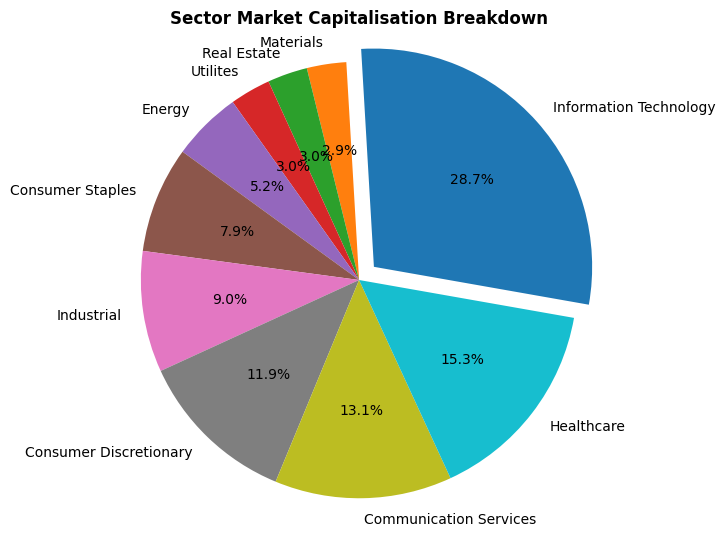

<Figure size 1000x2000 with 0 Axes>

In [56]:
labels = ['Information Technology','Materials','Real Estate','Utilites','Energy','Consumer Staples','Industrial','Consumer Discretionary','Communication Services','Healthcare']

sizes = [percent_marketcap_sum_sp500_index_sector_today_technology, 
         percent_marketcap_sum_sp500_index_sector_today_materials, 
         percent_marketcap_sum_sp500_index_sector_today_rea, 
         percent_marketcap_sum_sp500_index_sector_today_util, 
         percent_marketcap_sum_sp500_index_sector_today_nrg, 
         percent_marketcap_sum_sp500_index_sector_today_consta, 
         percent_marketcap_sum_sp500_index_sector_today_industrial, 
         percent_marketcap_sum_sp500_index_sector_today_condsi, 
         percent_marketcap_sum_sp500_index_sector_today_comser, 
         percent_marketcap_sum_sp500_index_sector_today_healthcare]

explode = (0.1,0,0,0,0,0,0,0,0,0)

fig = plt.figure()
fig.set_figheight(200)

plt.title("Sector Market Capitalisation Breakdown", fontweight='bold')
plt.pie(sizes, explode=explode,labels=labels, radius=1.1, autopct ="%1.1f%%", startangle=-10)
plt.figure(figsize=(10,20))


In [57]:
sp500_index_sector_today_technology_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
3,AAPL,Apple Inc.,145.43,0.7901,2303058556692,Information Technology,"Technology Hardware, Storage & Peripherals"
317,MSFT,Microsoft Corporation,252.75,1.9935,1884117328896,Information Technology,Systems Software
338,NVDA,NVIDIA Corporation,209.43,7.1966,521899560000,Information Technology,Semiconductors
463,V,Visa Inc.,230.90,0.2997,488958453151,Information Technology,Data Processing & Outsourced Services
287,MA,Mastercard Incorporated,374.08,0.9390,356798629233,Information Technology,Data Processing & Outsourced Services


In [58]:
sp500_index_sector_today_technology_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
145,DXC,DXC Technology Company,28.84,0.3829,6635074369,Information Technology,IT Consulting & Other Services
181,FFIV,"F5, Inc.",150.35,1.8218,9076419010,Information Technology,Communications Equipment
254,JNPR,"Juniper Networks, Inc.",30.99,-4.0557,10057990440,Information Technology,Communications Equipment
386,QRVO,"Qorvo, Inc.",113.53,4.4819,11510693284,Information Technology,Semiconductors
82,CDAY,Ceridian HCM Holding Inc.,75.76,4.8146,11636357806,Information Technology,Application Software


In [59]:
sp500_index_sector_today_industrials_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
460,UPS,"United Parcel Service, Inc.",184.98,-0.1350,159992543109,Industrials,Air Freight & Logistics
401,RTX,Raytheon Technologies Corporation,98.42,-1.4321,144683308349,Industrials,Aerospace & Defense
221,HON,Honeywell International Inc.,206.72,-0.8442,138982400532,Industrials,Industrial Conglomerates
76,CAT,Caterpillar Inc.,249.54,-1.0900,129862859864,Industrials,Construction Machinery & Heavy Trucks
52,BA,The Boeing Company,214.75,0.8216,127987344096,Industrials,Aerospace & Defense


In [60]:
sp500_index_sector_today_industrials_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
24,ALK,"Alaska Air Group, Inc.",51.84,0.9739,6575281920,Industrials,Airlines
203,GNRC,Generac Holdings Inc.,126.54,4.9254,8017118856,Industrials,Electrical Components & Equipment
218,HII,"Huntington Ingalls Industries, Inc.",218.36,-0.9885,8713328260,Industrials,Aerospace & Defense
392,RHI,Robert Half International Inc.,85.59,1.9414,9286429410,Industrials,Human Resource & Employment Services
373,PNR,Pentair plc,57.62,4.0448,9478374760,Industrials,Industrial Machinery


In [61]:
sp500_index_sector_today_healthcare_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
458,UNH,UnitedHealth Group Incorporated,497.00,-0.4387,464371449024,Health Care,Managed Health Care
253,JNJ,Johnson & Johnson,164.92,0.9179,431180020490,Health Care,Pharmaceuticals
275,LLY,Eli Lilly and Company,342.57,-0.4591,325502471979,Health Care,Pharmaceuticals
312,MRK,"Merck & Co., Inc.",106.98,-0.4003,271237085153,Health Care,Pharmaceuticals
4,ABBV,AbbVie Inc.,146.60,-0.7783,259259168000,Health Care,Pharmaceuticals


In [62]:
sp500_index_sector_today_healthcare_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
143,DVA,DaVita Inc.,84.81,2.9373,7641381000,Health Care,Health Care Facilities
346,OGN,Organon & Co.,30.31,0.5974,7709772840,Health Care,Pharmaceuticals
494,XRAY,DENTSPLY SIRONA Inc.,37.48,1.7649,8054901760,Health Care,Health Care Supplies
117,CTLT,"Catalent, Inc.",54.72,2.1849,9847630080,Health Care,Pharmaceuticals
456,UHS,"Universal Health Services, Inc.",152.67,3.0092,10901553409,Health Care,Health Care Facilities


In [63]:
sp500_index_sector_today_comser_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
205,GOOGL,Alphabet Inc.,100.43,1.6087,1309315997089,Communication Services,Interactive Media & Services
204,GOOG,Alphabet Inc.,101.43,1.5620,1303050857158,Communication Services,Interactive Media & Services
298,META,"Meta Platforms, Inc.",153.12,2.7858,401511268900,Communication Services,Interactive Media & Services
133,DIS,The Walt Disney Company,109.39,0.8296,199482511850,Communication Services,Movies & Entertainment
440,TMUS,"T-Mobile US, Inc.",150.97,1.1118,187829327916,Communication Services,Wireless Telecommunication Services


In [64]:
sp500_index_sector_today_comser_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
281,LUMN,"Lumen Technologies, Inc.",5.36,2.0952,5545348628,Communication Services,Alternative Carriers
134,DISH,DISH Network Corporation,14.93,3.7526,7923440520,Communication Services,Cable & Satellite
341,NWS,News Corporation,20.91,2.2994,11883780593,Communication Services,Publishing
342,NWSA,News Corporation,20.72,2.2705,12004920002,Communication Services,Publishing
320,MTCH,"Match Group, Inc.",51.41,-5.0074,14359120637,Communication Services,Interactive Media & Services


In [65]:
sp500_index_sector_today_consdi_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
34,AMZN,"Amazon.com, Inc.",105.15,1.9587,1072708792013,Consumer Discretionary,Internet & Direct Marketing Retail
447,TSLA,"Tesla, Inc.",181.41,4.7281,572847430403,Consumer Discretionary,Automobile Manufacturers
215,HD,"The Home Depot, Inc.",328.09,1.2092,334386052349,Consumer Discretionary,Home Improvement Retail
330,NKE,"NIKE, Inc.",129.50,1.7042,200797513784,Consumer Discretionary,"Apparel, Accessories & Luxury Goods"
291,MCD,McDonald's Corporation,266.27,-0.4226,195022538480,Consumer Discretionary,Restaurants


In [66]:
sp500_index_sector_today_conssta_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
485,WMT,Walmart Inc.,144.67,0.5561,390146056000,Consumer Staples,Hypermarkets & Super Centers
364,PG,The Procter & Gamble Company,143.19,0.5689,337805270346,Consumer Staples,Personal Products
266,KO,The Coca-Cola Company,61.33,0.0163,265222211057,Consumer Staples,Soft Drinks
361,PEP,"PepsiCo, Inc.",171.56,0.3157,236359919365,Consumer Staples,Soft Drinks
107,COST,Costco Wholesale Corporation,517.91,1.3245,229811682247,Consumer Staples,Hypermarkets & Super Centers


In [67]:
sp500_index_sector_today_conssta_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
429,TAP,Molson Coors Beverage Company,53.31,1.3884,11584902560,Consumer Staples,Brewers
284,LW,"Lamb Weston Holdings, Inc.",99.60,-0.2903,14329552397,Consumer Staples,Packaged Foods & Meats
108,CPB,Campbell Soup Company,51.67,-0.5007,15473511560,Consumer Staples,Packaged Foods & Meats
410,SJM,The J. M. Smucker Company,152.08,-0.4712,16217659120,Consumer Staples,Packaged Foods & Meats
73,CAG,"Conagra Brands, Inc.",36.91,-0.7529,17592118611,Consumer Staples,Packaged Foods & Meats


In [68]:
sp500_index_sector_today_nrg_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
493,XOM,Exxon Mobil Corporation,114.74,-1.0947,472532585421,Energy,Integrated Oil & Gas
122,CVX,Chevron Corporation,171.36,-1.5286,331348539433,Energy,Integrated Oil & Gas
106,COP,ConocoPhillips,117.70,-3.4217,146662440883,Energy,Oil & Gas Exploration & Production
411,SLB,Schlumberger Limited,55.70,-2.2464,79104580326,Energy,Oil & Gas Equipment & Services
158,EOG,"EOG Resources, Inc.",127.29,-3.7505,74768875137,Energy,Oil & Gas Exploration & Production


In [69]:
sp500_index_sector_today_nrg_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
162,EQT,EQT Corporation,31.63,-3.1833,11609665486,Energy,Oil & Gas Exploration & Production
39,APA,APA Corporation,43.40,-2.0979,13953620800,Energy,Oil & Gas Exploration & Production
442,TRGP,Targa Resources Corp.,74.58,-0.5865,16883048097,Energy,Oil & Gas Storage & Transportation
314,MRO,Marathon Oil Corporation,26.78,-2.5118,16955757428,Energy,Oil & Gas Exploration & Production
118,CTRA,Coterra Energy Inc.,24.54,-1.9576,19348980376,Energy,Oil & Gas Exploration & Production


In [70]:
sp500_index_sector_today_rea_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
370,PLD,"Prologis, Inc.",130.90,1.2531,120831037958,Real Estate,Industrial REITs
33,AMT,American Tower Corporation,227.14,1.6787,105757750474,Real Estate,Specialized REITs
160,EQIX,"Equinix, Inc.",738.13,0.0000,68305144800,Real Estate,Specialized REITs
80,CCI,Crown Castle Inc.,149.11,0.6752,64571787280,Real Estate,Specialized REITs
379,PSA,Public Storage,305.94,0.5257,53734689720,Real Estate,Specialized REITs


In [71]:
sp500_index_sector_today_rea_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
190,FRT,Federal Realty Investment Trust,112.04,0.4573,9098712828,Real Estate,Retail REITs
389,REG,Regency Centers Corporation,67.10,0.7054,11482353837,Real Estate,Retail REITs
71,BXP,"Boston Properties, Inc.",74.39,-0.2012,11661005045,Real Estate,Office REITs
110,CPT,Camden Property Trust,123.75,0.4383,13182840000,Real Estate,Residential REITs
226,HST,"Host Hotels & Resorts, Inc.",18.80,-0.2653,13442525798,Real Estate,Hotel & Resort REITs


In [72]:
sp500_index_sector_today_util_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
326,NEE,"NextEra Energy, Inc.",74.24,-0.5226,147526763151,Utilities,Multi-Utilities
142,DUK,Duke Energy Corporation,102.54,0.0879,78962257559,Utilities,Electric Utilities
414,SO,The Southern Company,68.86,1.7435,74965812895,Utilities,Electric Utilities
124,D,"Dominion Energy, Inc.",63.10,-0.8485,52579653005,Utilities,Electric Utilities
417,SRE,Sempra,159.88,-0.2807,50255558761,Utilities,Multi-Utilities


In [73]:
sp500_index_sector_today_util_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
333,NRG,"NRG Energy, Inc.",34.60,1.1105,7971286400,Utilities,Independent Power Producers & Energy Traders
374,PNW,Pinnacle West Capital Corporation,76.53,2.6559,8658604200,Utilities,Multi-Utilities
329,NI,NiSource Inc.,27.86,0.3964,11314893686,Utilities,Multi-Utilities
278,LNT,Alliant Energy Corporation,54.74,1.3141,13740944280,Utilities,Electric Utilities
168,EVRG,"Evergy, Inc.",62.89,0.3831,14435519040,Utilities,Electric Utilities


In [74]:
sp500_index_sector_today_materials_top5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
273,LIN,Linde plc,331.08,0.0423,163077093231,Materials,Industrial Gases
40,APD,"Air Products and Chemicals, Inc.",318.13,-0.7426,70621042440,Materials,Industrial Gases
177,FCX,Freeport-McMoRan Inc.,44.81,0.4258,64048279451,Materials,Copper
408,SHW,The Sherwin-Williams Company,243.22,2.8023,63028762406,Materials,Specialty Chemicals
120,CTVA,"Corteva, Inc.",64.48,0.0466,46070446223,Materials,Fertilizers & Agricultural Chemicals


In [75]:
sp500_index_sector_today_materials_bot5

,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
407,SEE,Sealed Air Corporation,54.78,0.0365,7924365240,Materials,Paper Packaging
487,WRK,WestRock Company,34.27,-12.6657,8722331860,Materials,Paper Packaging
155,EMN,Eastman Chemical Company,89.67,1.7013,10759503300,Materials,Diversified Chemicals
368,PKG,Packaging Corporation of America,142.15,-0.3854,13153778606,Materials,Paper Packaging
85,CE,Celanese Corporation,124.98,1.4448,13551331440,Materials,Specialty Chemicals
